In [1]:
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook

model = load_model('i_predict CD_3D+O2dist')

In [2]:
sc = StandardScaler()

In [3]:
df_aa = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3,4,5,6])

In [4]:
df_a = df_aa[7226:13019]
df_a

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
7226,-1.450814,1.481547,-0.065121,-1.581139,-0.898627,-0.627971
7227,-1.450814,1.481547,-0.093952,-1.581139,-0.898627,-0.644493
7228,-1.450814,1.426678,-0.122784,-1.581139,-0.898627,-0.667934
7229,-1.450814,1.481547,-0.122784,-1.581139,-0.898627,-0.660958
7230,-1.450814,1.426678,-0.036289,-1.581139,-0.898627,-0.618364
...,...,...,...,...,...,...
13014,1.452284,-1.426548,0.322045,-1.581139,-0.898627,0.354224
13015,1.452284,-1.426548,0.425015,-1.581139,-0.898627,0.369257
13016,1.452284,-1.426548,0.087274,-1.581139,-0.898627,0.286079
13017,1.452284,-1.426548,0.153175,-1.581139,-0.898627,0.309700


In [105]:
df_ab = pd.read_csv('CD_3D+O2dist 0.4-0.9V', usecols=[1,2,3,4,5,6])
df_c  = df_ab[7226:13019]
df_c

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
7226,0.0000,0.010638,0.000695,0.4,0.0,0.622780
7227,0.0000,0.010638,0.000690,0.4,0.0,0.587765
7228,0.0000,0.010441,0.000685,0.4,0.0,0.538085
7229,0.0000,0.010638,0.000685,0.4,0.0,0.552869
7230,0.0000,0.010441,0.000700,0.4,0.0,0.643142
...,...,...,...,...,...,...
13014,0.0008,0.000197,0.000762,0.4,0.0,2.704391
13015,0.0008,0.000197,0.000780,0.4,0.0,2.736251
13016,0.0008,0.000197,0.000721,0.4,0.0,2.559968
13017,0.0008,0.000197,0.000733,0.4,0.0,2.610028


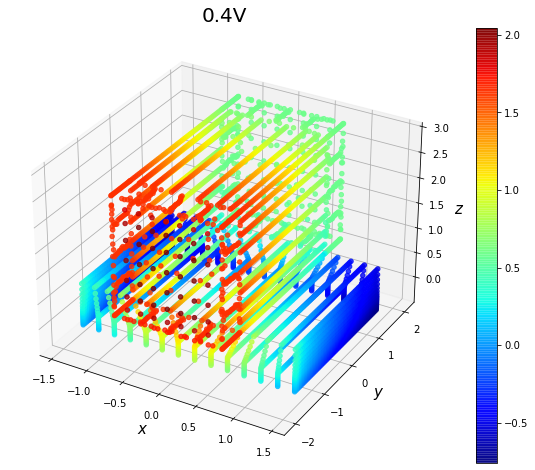

In [6]:
#正規化されてるグラフ
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

sc1 = ax1.scatter3D(df_a['x座標'], df_a['y座標'],df_a['z座標'], c=df_a['c[mol/m^3]'], cmap='jet', alpha=0.8) 
plt.colorbar(sc1)

ax1.set_title("0.4V", fontsize=20)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.set_zlabel('$z$', fontsize=15)

plt.show()

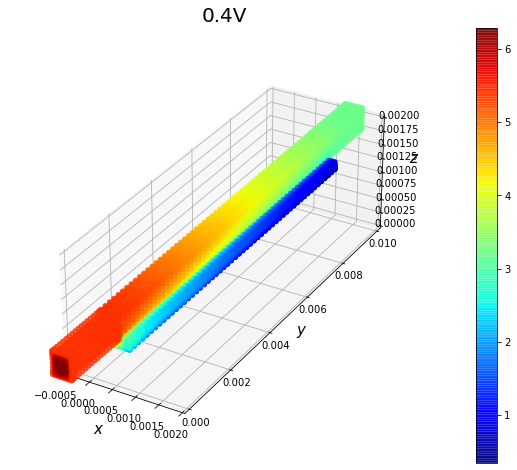

In [118]:
#正規化されてないグラフ
fig2 = plt.figure(figsize=(12,8))
ax2 = fig2.add_subplot(111, projection='3d')

sc2 = ax2.scatter(df_c['x座標'], df_c['y座標'],df_c['z座標'], c=df_c['c[mol/m^3]'], cmap='jet', alpha=0.8)
plt.colorbar(sc2)

ax2.set_title("0.4V", fontsize=20)
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel('$y$', fontsize=15)
ax2.set_zlabel('$z$', fontsize=15)
ax2.set_box_aspect((1,3,1))

ax2.set_xlim(-0.0005,0.002)
ax2.set_ylim(0,0.01)
ax2.set_zlim(0,0.002)

plt.savefig('PEM_CD_COMSOL.png')
plt.show()

In [45]:
df_v = df_aa.loc[:,'V[V]']
v_mean = df_v.mean()
v_std = df_v.std()
print(v_mean)
print(v_std)

-7.17642754996829e-16
1.000003491418965


In [9]:
#predictで正規化された出力求める→全てのパラメータを正規化から戻す

In [10]:
#v_a =   np.array(v)*v_std + v_mean 

In [11]:
#v_a

In [46]:
df_V = pd.DataFrame([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])
print(df_V.mean())
print(df_V.std())

0    0.65
dtype: float64
0    0.165831
dtype: float64


In [47]:
V_pre = (0.42-df_V.mean())/df_V.std()
V_pre

0   -1.386952
dtype: float64

In [82]:
df_pre = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3])

In [83]:
df_pre = df_pre[7226:13019]
df_pre

,x座標,y座標,z座標
7226,-1.450814,1.481547,-0.065121
7227,-1.450814,1.481547,-0.093952
7228,-1.450814,1.426678,-0.122784
7229,-1.450814,1.481547,-0.122784
7230,-1.450814,1.426678,-0.036289
...,...,...,...
13014,1.452284,-1.426548,0.322045
13015,1.452284,-1.426548,0.425015
13016,1.452284,-1.426548,0.087274
13017,1.452284,-1.426548,0.153175


In [84]:
df_pre.insert(3, 'V[V]', -1.386952) 
df_pre.reset_index(inplace=True, drop=True)
df_pre

,x座標,y座標,z座標,V[V]
0,-1.450814,1.481547,-0.065121,-1.386952
1,-1.450814,1.481547,-0.093952,-1.386952
2,-1.450814,1.426678,-0.122784,-1.386952
3,-1.450814,1.481547,-0.122784,-1.386952
4,-1.450814,1.426678,-0.036289,-1.386952
...,...,...,...,...
5788,1.452284,-1.426548,0.322045,-1.386952
5789,1.452284,-1.426548,0.425015,-1.386952
5790,1.452284,-1.426548,0.087274,-1.386952
5791,1.452284,-1.426548,0.153175,-1.386952


In [85]:
df_i_pre = pd.DataFrame(model.predict(df_pre), columns = ['i[A/m^2]','c[mol/m^3]'])

In [86]:
df_i_pre

,i[A/m^2],c[mol/m^3]
0,-0.896708,-0.534953
1,-0.896578,-0.548583
2,-0.896570,-0.551627
3,-0.896619,-0.558086
4,-0.897198,-0.510847
...,...,...
5788,-0.903196,0.359165
5789,-0.903890,0.385312
5790,-0.902033,0.308660
5791,-0.902385,0.324910


In [87]:
df = pd.concat([df_pre, df_i_pre], axis=1)

In [88]:
df

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,-1.450814,1.481547,-0.065121,-1.386952,-0.896708,-0.534953
1,-1.450814,1.481547,-0.093952,-1.386952,-0.896578,-0.548583
2,-1.450814,1.426678,-0.122784,-1.386952,-0.896570,-0.551627
3,-1.450814,1.481547,-0.122784,-1.386952,-0.896619,-0.558086
4,-1.450814,1.426678,-0.036289,-1.386952,-0.897198,-0.510847
...,...,...,...,...,...,...
5788,1.452284,-1.426548,0.322045,-1.386952,-0.903196,0.359165
5789,1.452284,-1.426548,0.425015,-1.386952,-0.903890,0.385312
5790,1.452284,-1.426548,0.087274,-1.386952,-0.902033,0.308660
5791,1.452284,-1.426548,0.153175,-1.386952,-0.902385,0.324910


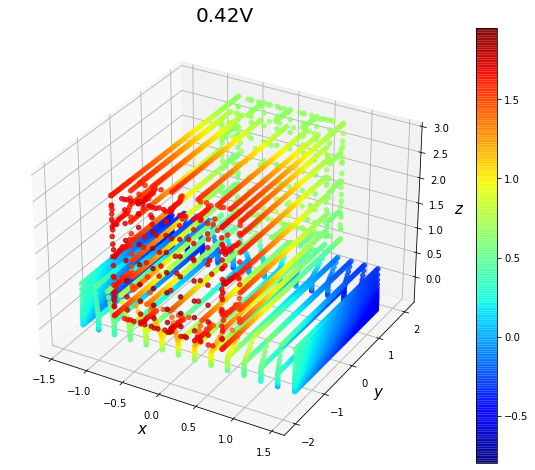

In [90]:
fig3 = plt.figure(figsize=(12, 8))
ax3 = fig3.add_subplot(111, projection='3d')

sc3 = ax3.scatter(df['x座標'], df['y座標'],df['z座標'], c=df['c[mol/m^3]'], cmap='jet', alpha=0.8)
plt.colorbar(sc3)

ax3.set_title("0.42V", fontsize=20)
ax3.set_xlabel('$x$', fontsize=15)
ax3.set_ylabel('$y$', fontsize=15)
ax3.set_zlabel('$z$', fontsize=15)


plt.show()
#plt.savefig('PEM_CD_Predict_stdL.png')

In [106]:
df_C = pd.read_csv('CD_3D+O2dist 0.4-0.9V', usecols=[6])

In [107]:
df_C.mean()

c[mol/m^3]    1.953668
dtype: float64

In [108]:
df_C.std()

c[mol/m^3]    2.119352
dtype: float64

In [109]:
df_C_re = df_i_pre*df_C.std() + df_C.mean()  #iの予測値の標準化を戻す
df_C_re

,c[mol/m^3],i[A/m^2]
0,0.819914,NaN
1,0.791027,NaN
2,0.784575,NaN
3,0.770887,NaN
4,0.871002,NaN
...,...,...
5788,2.714864,NaN
5789,2.770280,NaN
5790,2.607826,NaN
5791,2.642265,NaN


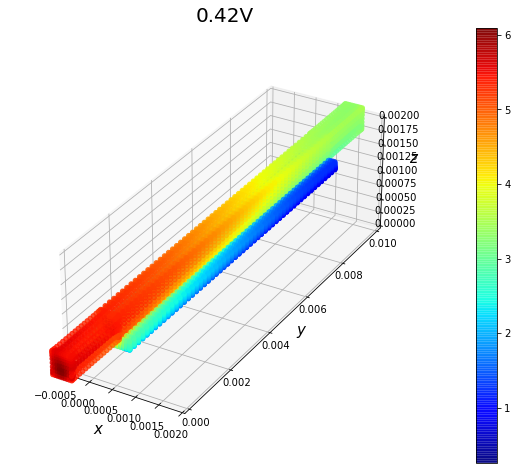

In [119]:
fig4 = plt.figure(figsize=(12, 8))
ax4 = fig4.add_subplot(111, projection='3d')

sc4 = ax4.scatter(df_c['x座標'], df_c['y座標'], df_c['z座標'],c=df_C_re['c[mol/m^3]'], cmap='jet', alpha=0.8)
plt.colorbar(sc4)

ax4.set_title("0.42V", fontsize=20)
ax4.set_xlabel('$x$', fontsize=15)
ax4.set_ylabel('$y$', fontsize=15)
ax4.set_zlabel('$z$', fontsize=15)
ax4.set_box_aspect((1,3,1))

ax4.set_xlim(-0.0005,0.002)
ax4.set_ylim(0,0.01)
ax4.set_zlim(0,0.002)

plt.savefig('PEM_O2dist_Predict_0.42V.png')
plt.show()

In [6]:
df_d = pd.read_excel('/Users/aruhy/OneDrive/デスクトップ/data/11-27/O2dist_0.42V.xlsx'
                     ,names=['x座標','y座標','z座標','c[mol/m^3]'] ,header=8) 

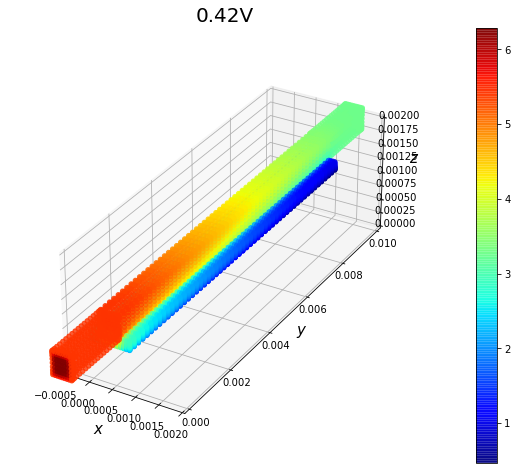

In [7]:
#COMSOLの結果
fig5 = plt.figure(figsize=(12, 8))
ax5 = fig5.add_subplot(111, projection='3d')

sc5 = ax5.scatter(df_d['x座標'], df_d['y座標'],df_d['z座標'], c=df_d['c[mol/m^3]'], cmap='jet', alpha=0.8)
plt.colorbar(sc5)

ax5.set_title("0.42V", fontsize=20)
ax5.set_xlabel('$x$', fontsize=15)
ax5.set_ylabel('$y$', fontsize=15)
ax5.set_zlabel('$z$', fontsize=15)
ax5.set_box_aspect((1,3,1))

ax5.set_xlim(-0.0005,0.002)
ax5.set_ylim(0,0.01)
ax5.set_zlim(0,0.002)

plt.savefig('PEM_O2dist_COMSOL_0.42V.png')
plt.show()